From Web page: https://analyticsindiamag.com/7-types-classification-algorithms/

From GitHub https://github.com/f2005636/Classification

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

In [2]:
df = pd.read_csv('00 df.csv')
df = df[df['flag']=='train']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  32561 non-null  object
 1   occupation_bin      32561 non-null  object
 2   msr_bin             32561 non-null  object
 3   capital_gl_bin      32561 non-null  object
 4   race_sex_bin        32561 non-null  object
 5   education_num_bin   32561 non-null  object
 6   education_bin       32561 non-null  object
 7   workclass_bin       32561 non-null  object
 8   age_bin             32561 non-null  object
 9   flag                32561 non-null  object
 10  y                   32561 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 3.0+ MB


In [3]:
df.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [4]:
df.tail()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
32556,b. 31-40,d. Mid - High,c. High,a. = 0,b. Mid,b. 9-12,b. Mid,b. income,b. 26-30 & 71-100,train,0
32557,b. 31-40,b. Mid - Low,c. High,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,1
32558,b. 31-40,b. Mid - Low,b. Mid,a. = 0,b. Mid,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
32559,a. 0-30,b. Mid - Low,a. Low,a. = 0,c. High,b. 9-12,b. Mid,b. income,a. 0-25,train,0
32560,b. 31-40,e. High,c. High,c. > 0,b. Mid,b. 9-12,b. Mid,b. income,e. 40-55,train,1


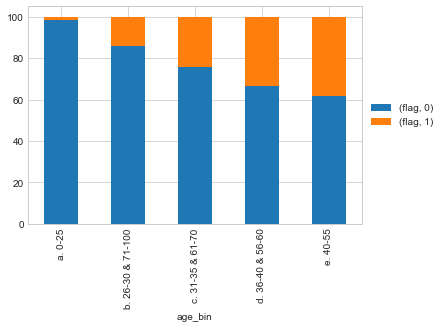

In [5]:
#age_bin
x_chart = df.pivot_table(values=['flag'], index=['age_bin'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [6]:
x_chart = df.pivot_table(values=['flag'], index=['age_bin'], columns=['y'], aggfunc='count')
x_chart

flag      
y                     0     1
age_bin                      
a. 0-25            6297   114
b. 26-30 & 71-100  4039   662
c. 31-35 & 61-70   4665  1480
d. 36-40 & 56-60   3962  1988
e. 40-55           5757  3597

In [7]:
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart

flag           
y                          0          1
age_bin                                
a. 0-25            98.221806   1.778194
b. 26-30 & 71-100  85.917890  14.082110
c. 31-35 & 61-70   75.915378  24.084622
d. 36-40 & 56-60   66.588235  33.411765
e. 40-55           61.545863  38.454137

In [11]:
age_25 = df[df['age_bin']=='a. 0-25' ]
age_25['y'].value_counts()

0    6297
1     114
Name: y, dtype: int64

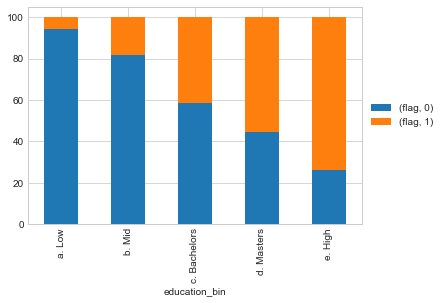

In [19]:
x_chart = df.pivot_table(index='education_bin', values=['flag'], columns=['y'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind='bar', stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5));